In [13]:
from MLP import Dense, Sigmoid, Tanh, Relu, NeuralNetwork
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# f(x) = sin(x)/x

In [14]:
#Creating data
x = np.linspace(-1, 1, 1000)
y = (np.sin(x)/x)

x_train_sin, x_test_sin, y_train_sin, y_true_sin = train_test_split(x, y, test_size=0.3, random_state=42)

x_train_sin = np.reshape(x_train_sin, (np.size(x_train_sin), 1, 1))
y_train_sin = np.reshape(y_train_sin, (np.size(y_train_sin), 1, 1))

#Training and predicting
learning_rate = 0.005
NN_sin = NeuralNetwork([Dense(1, 10), Sigmoid(), Dense(10, 10), Tanh(), Dense(10, 1)])
NN_sin.fit(x_train_sin, y_train_sin, learning_rate=learning_rate, max_iterations=1000)

y_pred_sin = []
for point in x_test_sin:
    y_pred_sin.append(NN_sin.predict(point))
y_pred_sin = np.array(y_pred_sin).ravel()

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

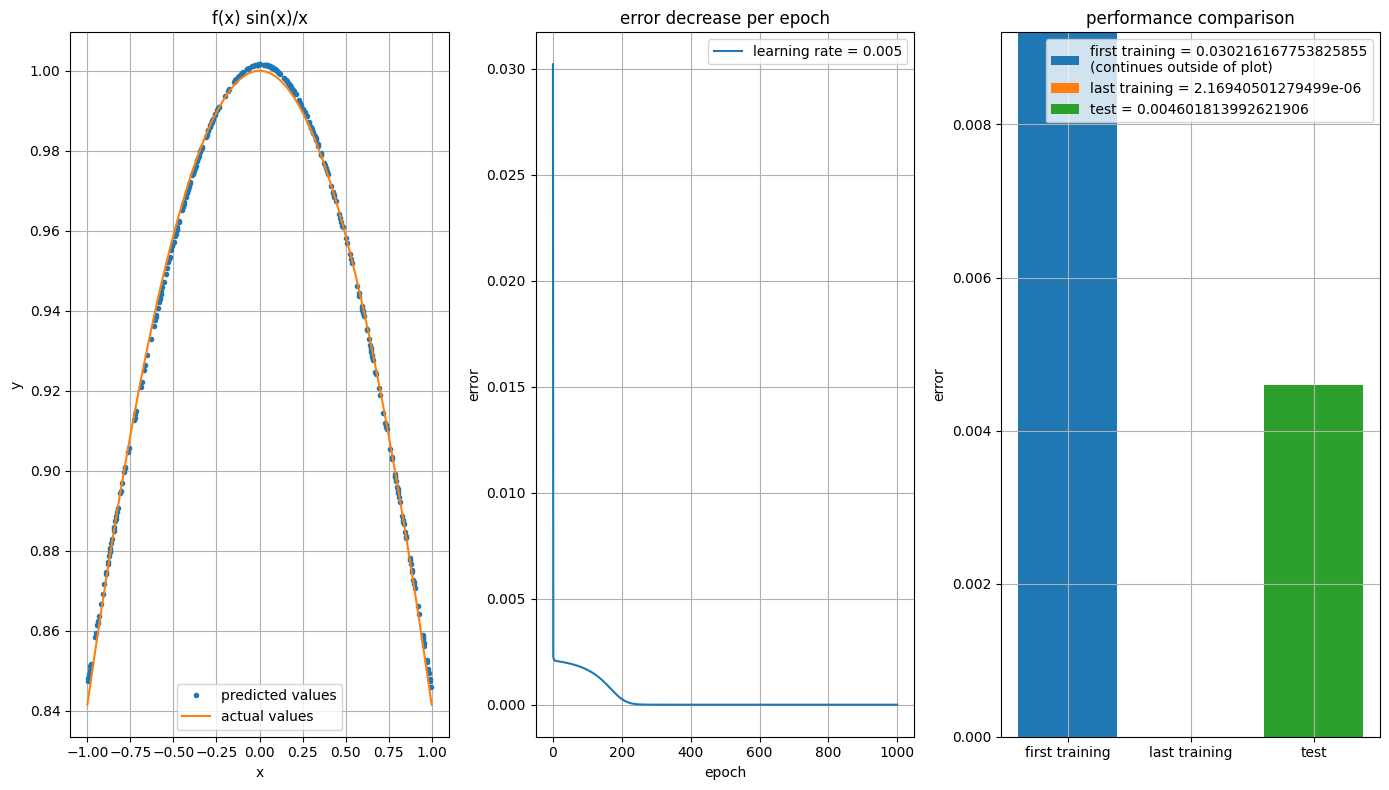

In [15]:
#plotting predictions
plt.figure(figsize=(14, 8))
plt.subplot(1, 3, 1)
plt.plot(x_test_sin, y_pred_sin, '.', label='predicted values')
plt.plot(x, y, label='actual values')
plt.title('f(x) sin(x)/x')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.legend()

#plotting error decrease per epoch
errors_sin = NN_sin.error_history
x_plot_sin = np.linspace(0, len(errors_sin), len(errors_sin))
plt.subplot(1, 3, 2)
plt.plot(x_plot_sin, errors_sin, label=f"learning rate = {learning_rate}")
plt.title('error decrease per epoch')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend()
plt.grid()

#plotting bar plot of the performaces
test_mse_sin = NN_sin.mse(y_train_sin, y_pred_sin)
plt.subplot(1, 3, 3)
bar_labels = ['first training', 'last training', 'test']
bar_values = [errors_sin[0], errors_sin[-1], test_mse_sin]
plt.bar(bar_labels[0], bar_values[0], label=f'{bar_labels[0]} = {bar_values[0]}\n(continues outside of plot)')
plt.bar(bar_labels[1], bar_values[1], label=f'{bar_labels[1]} = {bar_values[1]}')
plt.bar(bar_labels[2], bar_values[2], label=f'{bar_labels[2]} = {bar_values[2]}')
plt.title('performance comparison')
plt.ylabel('error')
plt.ylim(0, bar_values[2]*2)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()